In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import unit_norm
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.image import rgb_to_grayscale

/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stevevn/anaconda3/envs/pytorch/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/stevevn/anaco

In [2]:
cat = 'mmm'

In [3]:
df = pd.read_csv(f'{cat}_attr.csv')
df = df.drop(df.columns[1:5], axis = 1).fillna(0)
df

,image_name,mini,midi,maxi
0,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
1,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
2,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
3,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
4,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1.0,0.0,0.0
...,...,...,...,...
8180,img/Chiffon-Paneled_Maxi_Dress/img_00000024.jpg,0.0,0.0,1.0
8181,img/Crocheted_Gauze_Maxi_Dress/img_00000020.jpg,0.0,0.0,1.0
8182,img/Dainty_A-Line_Dress/img_00000074.jpg,0.0,0.0,1.0
8183,img/Butterfly_Print_Maxi_Dress/img_00000066.jpg,0.0,0.0,1.0


In [4]:
all_array = np.load(f'{cat}_array.npz', allow_pickle=True)['arr_0']
all_array = np.array([x.numpy() / 255 for x in all_array]) #color
# all_array = np.array([rgb_to_grayscale(x.numpy()) / 255 for x in all_array]) #grayscale

all_array

2022-05-24 02:16:16.181619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 02:16:16.218376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 02:16:16.219179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 02:16:16.220755: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(all_array, df.drop('image_name', axis=1), random_state=1, test_size=0.2)

In [6]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(100,100,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(3, activation="softmax"))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 25, 25, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 256)      1

In [7]:
AlexNet.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

In [8]:
batch_size = 64
epochs = 150

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, min_delta = 0.05, verbose = 1)

history_self = AlexNet.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Epoch 1/150


2022-05-24 02:16:46.181002: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303
2022-05-24 02:16:48.505540: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


103/103 [==============================] - 13s 42ms/step - loss: 1.2420 - accuracy: 0.4661 - val_loss: 1.1602 - val_accuracy: 0.4013
Epoch 2/150
103/103 [==============================] - 3s 30ms/step - loss: 1.0202 - accuracy: 0.5880 - val_loss: 1.2796 - val_accuracy: 0.3378
Epoch 3/150
103/103 [==============================] - 3s 30ms/step - loss: 0.8992 - accuracy: 0.6460 - val_loss: 1.4436 - val_accuracy: 0.4142
Epoch 4/150
103/103 [==============================] - 3s 30ms/step - loss: 0.7727 - accuracy: 0.7049 - val_loss: 1.0849 - val_accuracy: 0.5767
Epoch 5/150
103/103 [==============================] - 3s 29ms/step - loss: 0.6999 - accuracy: 0.7346 - val_loss: 1.2868 - val_accuracy: 0.5822
Epoch 6/150
103/103 [==============================] - 3s 29ms/step - loss: 0.6133 - accuracy: 0.7666 - val_loss: 1.0983 - val_accuracy: 0.5828
Epoch 7/150
103/103 [==============================] - 3s 29ms/step - loss: 0.4978 - accuracy: 0.8089 - val_loss: 1.0267 - val_accuracy: 0.6371
Epo

Text(0.5, 1.0, 'Loss Curves')

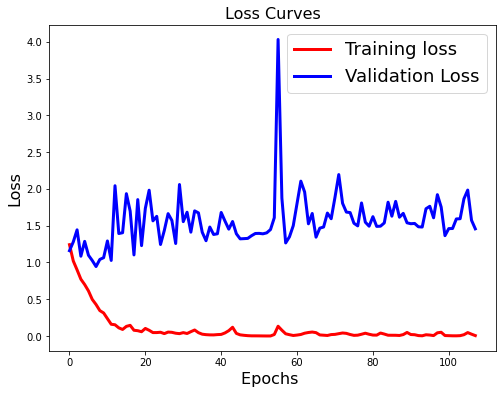

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['loss'],'r',linewidth=3.0)
plt.plot(history_self.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

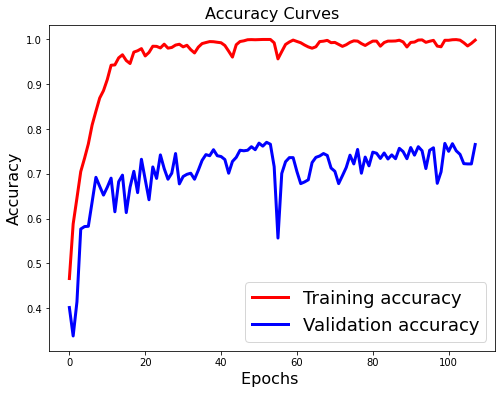

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history_self.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_self.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

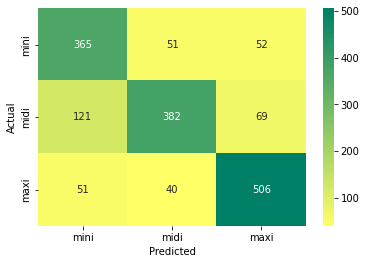

,mini,midi,maxi
3891,0.0,1.0,0.0
7379,0.0,0.0,1.0
473,1.0,0.0,0.0
1750,1.0,0.0,0.0
1332,1.0,0.0,0.0
...,...,...,...
6378,0.0,0.0,1.0
4515,0.0,1.0,0.0
4425,0.0,1.0,0.0
1929,1.0,0.0,0.0


In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(AlexNet.predict(X_test), axis = 1)

y_test_label = np.argmax(y_test.to_numpy(), axis = 1)

matrix = confusion_matrix(y_test_label, y_pred)
ticks = ['mini','midi','maxi']
sns.heatmap(matrix, annot=True, fmt='g', xticklabels=ticks, yticklabels=ticks, cmap='summer_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

wrong_pred = y_test[y_pred != y_test_label]
wrong_pred

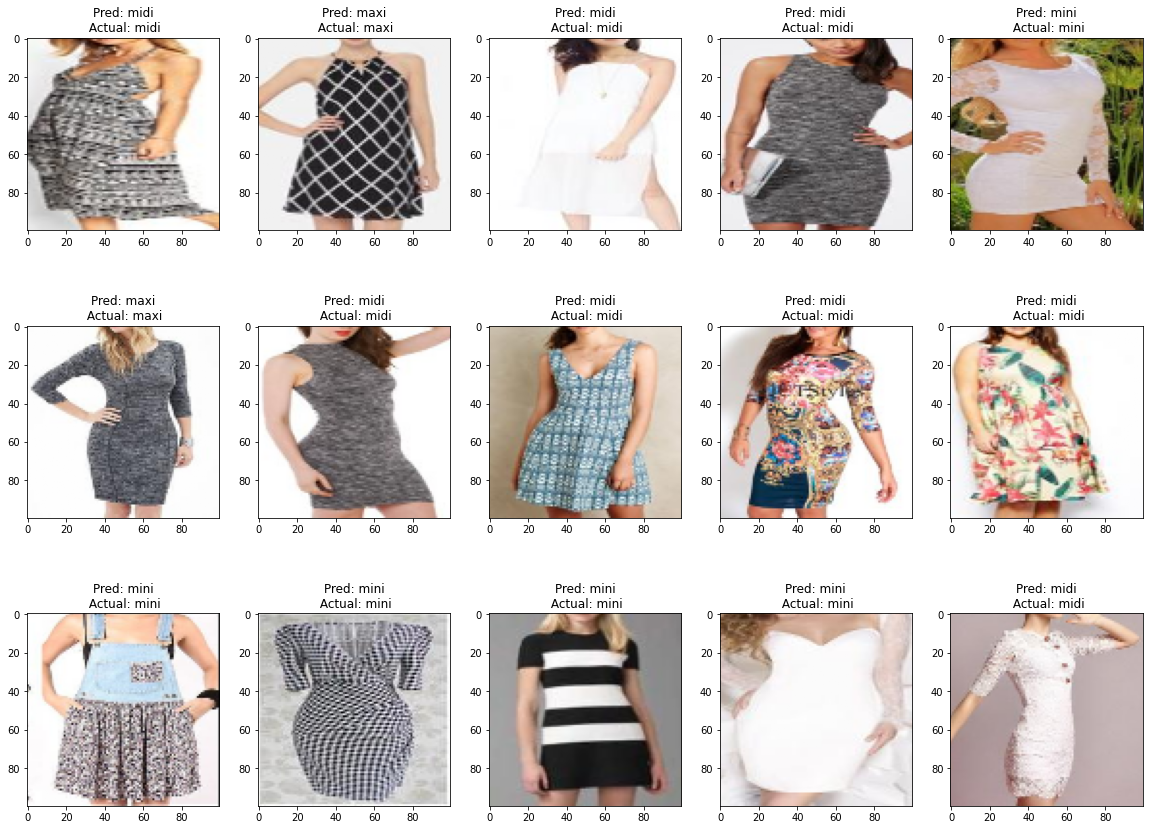

In [16]:
fig, ax = plt.subplots(3, 5, figsize = (20,15))
sample = wrong_pred.sample(15)
sample['pred'] = sample.apply(lambda x : 'mini' if x['mini'] else ('midi' if x['midi'] else 'maxi') , axis = 1)
actual = df.loc[sample.index].apply(lambda x : 'mini' if x['mini'] else ('midi' if x['midi'] else 'maxi') , axis = 1)
for k, a in enumerate(ax.flatten()):
    a.imshow(all_array[sample.iloc[k].name])
    a.set_title(f'Pred: {sample.iloc[k, -1]}\n Actual: {actual.at[sample.iloc[k].name]}')
plt.show()